## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 48.5ms	remaining: 48.5s
1:	learn: 0.9301086	total: 50.5ms	remaining: 25.2s
2:	learn: 0.9005637	total: 52.3ms	remaining: 17.4s
3:	learn: 0.8720983	total: 54.4ms	remaining: 13.5s
4:	learn: 0.8467410	total: 56.2ms	remaining: 11.2s
5:	learn: 0.8226672	total: 58.1ms	remaining: 9.62s
6:	learn: 0.7994702	total: 59.9ms	remaining: 8.5s
7:	learn: 0.7784272	total: 61.8ms	remaining: 7.66s
8:	learn: 0.7602192	total: 63.8ms	remaining: 7.02s
9:	learn: 0.7412421	total: 65.6ms	remaining: 6.5s
10:	learn: 0.7247930	total: 67.6ms	remaining: 6.08s
11:	learn: 0.7089951	total: 69.6ms	remaining: 5.73s
12:	learn: 0.6951345	total: 71.5ms	remaining: 5.42s
13:	learn: 0.6809276	total: 73.3ms	remaining: 5.16s
14:	learn: 0.6692630	total: 75.2ms	remaining: 4.93s
15:	learn: 0.6588323	total: 77ms	remaining: 4.73s
16:	learn: 0.6472700	total: 78.8ms	remaining: 4.56s
17:	learn: 0.6379982	total: 80.6ms	remaining: 4.4s
18:	learn: 0.6294674	total: 82.5ms	remaining: 4.26s
19:	learn: 0.6193295	total:

62:	learn: 0.4792422	total: 165ms	remaining: 2.46s
63:	learn: 0.4780719	total: 168ms	remaining: 2.46s
64:	learn: 0.4771984	total: 170ms	remaining: 2.44s
65:	learn: 0.4759610	total: 172ms	remaining: 2.43s
66:	learn: 0.4750287	total: 173ms	remaining: 2.42s
67:	learn: 0.4740093	total: 175ms	remaining: 2.4s
68:	learn: 0.4732612	total: 177ms	remaining: 2.39s
69:	learn: 0.4727266	total: 179ms	remaining: 2.38s
70:	learn: 0.4716549	total: 181ms	remaining: 2.37s
71:	learn: 0.4709088	total: 183ms	remaining: 2.35s
72:	learn: 0.4697594	total: 185ms	remaining: 2.34s
73:	learn: 0.4690934	total: 187ms	remaining: 2.33s
74:	learn: 0.4680942	total: 188ms	remaining: 2.32s
75:	learn: 0.4672726	total: 190ms	remaining: 2.31s
76:	learn: 0.4664479	total: 192ms	remaining: 2.3s
77:	learn: 0.4656044	total: 194ms	remaining: 2.29s
78:	learn: 0.4645375	total: 196ms	remaining: 2.28s
79:	learn: 0.4639654	total: 197ms	remaining: 2.27s
80:	learn: 0.4628457	total: 199ms	remaining: 2.26s
81:	learn: 0.4620203	total: 201ms

87:	learn: 0.4577999	total: 213ms	remaining: 2.2s
88:	learn: 0.4572657	total: 215ms	remaining: 2.2s
89:	learn: 0.4569360	total: 217ms	remaining: 2.19s
90:	learn: 0.4559969	total: 219ms	remaining: 2.19s
91:	learn: 0.4549716	total: 221ms	remaining: 2.18s
92:	learn: 0.4544919	total: 222ms	remaining: 2.17s
93:	learn: 0.4537693	total: 224ms	remaining: 2.16s
94:	learn: 0.4532673	total: 226ms	remaining: 2.15s
95:	learn: 0.4526987	total: 228ms	remaining: 2.15s
96:	learn: 0.4520952	total: 230ms	remaining: 2.14s
97:	learn: 0.4513919	total: 231ms	remaining: 2.13s
98:	learn: 0.4503747	total: 233ms	remaining: 2.12s
99:	learn: 0.4494783	total: 235ms	remaining: 2.12s
100:	learn: 0.4487329	total: 237ms	remaining: 2.11s
101:	learn: 0.4481325	total: 239ms	remaining: 2.1s
102:	learn: 0.4475445	total: 241ms	remaining: 2.1s
103:	learn: 0.4466014	total: 243ms	remaining: 2.09s
104:	learn: 0.4461730	total: 244ms	remaining: 2.08s
105:	learn: 0.4457259	total: 246ms	remaining: 2.08s
106:	learn: 0.4451085	total: 

150:	learn: 0.4253062	total: 330ms	remaining: 1.85s
151:	learn: 0.4247446	total: 332ms	remaining: 1.85s
152:	learn: 0.4237365	total: 334ms	remaining: 1.85s
153:	learn: 0.4233079	total: 336ms	remaining: 1.84s
154:	learn: 0.4228876	total: 338ms	remaining: 1.84s
155:	learn: 0.4225404	total: 340ms	remaining: 1.84s
156:	learn: 0.4222831	total: 342ms	remaining: 1.83s
157:	learn: 0.4218088	total: 344ms	remaining: 1.83s
158:	learn: 0.4213239	total: 345ms	remaining: 1.83s
159:	learn: 0.4210022	total: 347ms	remaining: 1.82s
160:	learn: 0.4201256	total: 349ms	remaining: 1.82s
161:	learn: 0.4197073	total: 351ms	remaining: 1.82s
162:	learn: 0.4192052	total: 353ms	remaining: 1.81s
163:	learn: 0.4187949	total: 355ms	remaining: 1.81s
164:	learn: 0.4184572	total: 357ms	remaining: 1.8s
165:	learn: 0.4180680	total: 359ms	remaining: 1.8s
166:	learn: 0.4176884	total: 360ms	remaining: 1.8s
167:	learn: 0.4173026	total: 362ms	remaining: 1.79s
168:	learn: 0.4170486	total: 364ms	remaining: 1.79s
169:	learn: 0.4

176:	learn: 0.4136755	total: 381ms	remaining: 1.77s
177:	learn: 0.4133860	total: 383ms	remaining: 1.77s
178:	learn: 0.4129780	total: 385ms	remaining: 1.76s
179:	learn: 0.4122907	total: 386ms	remaining: 1.76s
180:	learn: 0.4119188	total: 388ms	remaining: 1.76s
181:	learn: 0.4115412	total: 390ms	remaining: 1.75s
182:	learn: 0.4112620	total: 392ms	remaining: 1.75s
183:	learn: 0.4107734	total: 394ms	remaining: 1.75s
184:	learn: 0.4104881	total: 396ms	remaining: 1.74s
185:	learn: 0.4100009	total: 398ms	remaining: 1.74s
186:	learn: 0.4096453	total: 400ms	remaining: 1.74s
187:	learn: 0.4093395	total: 402ms	remaining: 1.73s
188:	learn: 0.4090020	total: 403ms	remaining: 1.73s
189:	learn: 0.4085981	total: 405ms	remaining: 1.73s
190:	learn: 0.4082397	total: 407ms	remaining: 1.72s
191:	learn: 0.4079846	total: 409ms	remaining: 1.72s
192:	learn: 0.4076364	total: 411ms	remaining: 1.72s
193:	learn: 0.4069970	total: 413ms	remaining: 1.72s
194:	learn: 0.4066685	total: 415ms	remaining: 1.71s
195:	learn: 

235:	learn: 0.3944181	total: 493ms	remaining: 1.6s
236:	learn: 0.3941497	total: 495ms	remaining: 1.59s
237:	learn: 0.3939819	total: 497ms	remaining: 1.59s
238:	learn: 0.3938322	total: 499ms	remaining: 1.59s
239:	learn: 0.3935463	total: 501ms	remaining: 1.59s
240:	learn: 0.3933166	total: 503ms	remaining: 1.58s
241:	learn: 0.3930992	total: 505ms	remaining: 1.58s
242:	learn: 0.3928898	total: 507ms	remaining: 1.58s
243:	learn: 0.3926199	total: 509ms	remaining: 1.58s
244:	learn: 0.3923955	total: 511ms	remaining: 1.57s
245:	learn: 0.3922312	total: 513ms	remaining: 1.57s
246:	learn: 0.3919499	total: 514ms	remaining: 1.57s
247:	learn: 0.3917420	total: 516ms	remaining: 1.56s
248:	learn: 0.3915186	total: 518ms	remaining: 1.56s
249:	learn: 0.3912759	total: 520ms	remaining: 1.56s
250:	learn: 0.3908375	total: 522ms	remaining: 1.56s
251:	learn: 0.3904815	total: 524ms	remaining: 1.55s
252:	learn: 0.3902127	total: 526ms	remaining: 1.55s
253:	learn: 0.3900274	total: 528ms	remaining: 1.55s
254:	learn: 0

261:	learn: 0.3882459	total: 546ms	remaining: 1.54s
262:	learn: 0.3881101	total: 549ms	remaining: 1.54s
263:	learn: 0.3879324	total: 550ms	remaining: 1.53s
264:	learn: 0.3876861	total: 552ms	remaining: 1.53s
265:	learn: 0.3874255	total: 554ms	remaining: 1.53s
266:	learn: 0.3868515	total: 556ms	remaining: 1.53s
267:	learn: 0.3866114	total: 558ms	remaining: 1.52s
268:	learn: 0.3863119	total: 560ms	remaining: 1.52s
269:	learn: 0.3860579	total: 562ms	remaining: 1.52s
270:	learn: 0.3858830	total: 564ms	remaining: 1.52s
271:	learn: 0.3857050	total: 566ms	remaining: 1.51s
272:	learn: 0.3855021	total: 568ms	remaining: 1.51s
273:	learn: 0.3852614	total: 570ms	remaining: 1.51s
274:	learn: 0.3851459	total: 572ms	remaining: 1.51s
275:	learn: 0.3849180	total: 574ms	remaining: 1.5s
276:	learn: 0.3846590	total: 576ms	remaining: 1.5s
277:	learn: 0.3844409	total: 578ms	remaining: 1.5s
278:	learn: 0.3842433	total: 580ms	remaining: 1.5s
279:	learn: 0.3840246	total: 582ms	remaining: 1.5s
280:	learn: 0.383

317:	learn: 0.3762751	total: 657ms	remaining: 1.41s
318:	learn: 0.3761284	total: 660ms	remaining: 1.41s
319:	learn: 0.3760168	total: 662ms	remaining: 1.41s
320:	learn: 0.3757763	total: 665ms	remaining: 1.41s
321:	learn: 0.3756076	total: 667ms	remaining: 1.4s
322:	learn: 0.3754123	total: 669ms	remaining: 1.4s
323:	learn: 0.3751852	total: 671ms	remaining: 1.4s
324:	learn: 0.3750004	total: 674ms	remaining: 1.4s
325:	learn: 0.3749086	total: 676ms	remaining: 1.4s
326:	learn: 0.3746654	total: 678ms	remaining: 1.39s
327:	learn: 0.3745405	total: 680ms	remaining: 1.39s
328:	learn: 0.3743710	total: 682ms	remaining: 1.39s
329:	learn: 0.3741679	total: 684ms	remaining: 1.39s
330:	learn: 0.3738646	total: 687ms	remaining: 1.39s
331:	learn: 0.3736647	total: 689ms	remaining: 1.39s
332:	learn: 0.3733429	total: 692ms	remaining: 1.39s
333:	learn: 0.3732059	total: 694ms	remaining: 1.38s
334:	learn: 0.3730574	total: 697ms	remaining: 1.38s
335:	learn: 0.3728663	total: 699ms	remaining: 1.38s
336:	learn: 0.372

341:	learn: 0.3716519	total: 713ms	remaining: 1.37s
342:	learn: 0.3714592	total: 715ms	remaining: 1.37s
343:	learn: 0.3713389	total: 717ms	remaining: 1.37s
344:	learn: 0.3711642	total: 720ms	remaining: 1.37s
345:	learn: 0.3709569	total: 722ms	remaining: 1.36s
346:	learn: 0.3708184	total: 724ms	remaining: 1.36s
347:	learn: 0.3705958	total: 726ms	remaining: 1.36s
348:	learn: 0.3703798	total: 728ms	remaining: 1.36s
349:	learn: 0.3701923	total: 731ms	remaining: 1.36s
350:	learn: 0.3700067	total: 733ms	remaining: 1.35s
351:	learn: 0.3698930	total: 735ms	remaining: 1.35s
352:	learn: 0.3697314	total: 737ms	remaining: 1.35s
353:	learn: 0.3695617	total: 739ms	remaining: 1.35s
354:	learn: 0.3694397	total: 741ms	remaining: 1.35s
355:	learn: 0.3692589	total: 744ms	remaining: 1.34s
356:	learn: 0.3691107	total: 746ms	remaining: 1.34s
357:	learn: 0.3689645	total: 748ms	remaining: 1.34s
358:	learn: 0.3687886	total: 750ms	remaining: 1.34s
359:	learn: 0.3686485	total: 752ms	remaining: 1.34s
360:	learn: 

391:	learn: 0.3636336	total: 822ms	remaining: 1.27s
392:	learn: 0.3635003	total: 824ms	remaining: 1.27s
393:	learn: 0.3633029	total: 827ms	remaining: 1.27s
394:	learn: 0.3632136	total: 829ms	remaining: 1.27s
395:	learn: 0.3629529	total: 831ms	remaining: 1.27s
396:	learn: 0.3627743	total: 833ms	remaining: 1.26s
397:	learn: 0.3626747	total: 835ms	remaining: 1.26s
398:	learn: 0.3625881	total: 837ms	remaining: 1.26s
399:	learn: 0.3622963	total: 840ms	remaining: 1.26s
400:	learn: 0.3622314	total: 842ms	remaining: 1.26s
401:	learn: 0.3620143	total: 844ms	remaining: 1.25s
402:	learn: 0.3618403	total: 846ms	remaining: 1.25s
403:	learn: 0.3616747	total: 849ms	remaining: 1.25s
404:	learn: 0.3614255	total: 851ms	remaining: 1.25s
405:	learn: 0.3613607	total: 853ms	remaining: 1.25s
406:	learn: 0.3612875	total: 855ms	remaining: 1.25s
407:	learn: 0.3611516	total: 857ms	remaining: 1.24s
408:	learn: 0.3609621	total: 859ms	remaining: 1.24s
409:	learn: 0.3608193	total: 862ms	remaining: 1.24s
410:	learn: 

416:	learn: 0.3594487	total: 877ms	remaining: 1.23s
417:	learn: 0.3592759	total: 879ms	remaining: 1.22s
418:	learn: 0.3591088	total: 882ms	remaining: 1.22s
419:	learn: 0.3589470	total: 884ms	remaining: 1.22s
420:	learn: 0.3587972	total: 886ms	remaining: 1.22s
421:	learn: 0.3586831	total: 888ms	remaining: 1.22s
422:	learn: 0.3585620	total: 890ms	remaining: 1.21s
423:	learn: 0.3584427	total: 893ms	remaining: 1.21s
424:	learn: 0.3583044	total: 895ms	remaining: 1.21s
425:	learn: 0.3581698	total: 897ms	remaining: 1.21s
426:	learn: 0.3580461	total: 899ms	remaining: 1.21s
427:	learn: 0.3579182	total: 901ms	remaining: 1.2s
428:	learn: 0.3577521	total: 903ms	remaining: 1.2s
429:	learn: 0.3576138	total: 905ms	remaining: 1.2s
430:	learn: 0.3575528	total: 907ms	remaining: 1.2s
431:	learn: 0.3574686	total: 910ms	remaining: 1.2s
432:	learn: 0.3572923	total: 912ms	remaining: 1.19s
433:	learn: 0.3571859	total: 914ms	remaining: 1.19s
434:	learn: 0.3570185	total: 916ms	remaining: 1.19s
435:	learn: 0.356

468:	learn: 0.3522115	total: 988ms	remaining: 1.12s
469:	learn: 0.3521029	total: 991ms	remaining: 1.12s
470:	learn: 0.3519673	total: 993ms	remaining: 1.11s
471:	learn: 0.3518082	total: 995ms	remaining: 1.11s
472:	learn: 0.3516593	total: 997ms	remaining: 1.11s
473:	learn: 0.3514906	total: 999ms	remaining: 1.11s
474:	learn: 0.3513843	total: 1s	remaining: 1.11s
475:	learn: 0.3512406	total: 1s	remaining: 1.1s
476:	learn: 0.3510044	total: 1s	remaining: 1.1s
477:	learn: 0.3509121	total: 1.01s	remaining: 1.1s
478:	learn: 0.3507270	total: 1.01s	remaining: 1.1s
479:	learn: 0.3506003	total: 1.01s	remaining: 1.1s
480:	learn: 0.3505111	total: 1.01s	remaining: 1.09s
481:	learn: 0.3503906	total: 1.02s	remaining: 1.09s
482:	learn: 0.3501522	total: 1.02s	remaining: 1.09s
483:	learn: 0.3500494	total: 1.02s	remaining: 1.09s
484:	learn: 0.3498921	total: 1.02s	remaining: 1.08s
485:	learn: 0.3497143	total: 1.02s	remaining: 1.08s
486:	learn: 0.3496172	total: 1.03s	remaining: 1.08s
487:	learn: 0.3494609	tota

494:	learn: 0.3485016	total: 1.04s	remaining: 1.06s
495:	learn: 0.3484072	total: 1.05s	remaining: 1.06s
496:	learn: 0.3482698	total: 1.05s	remaining: 1.06s
497:	learn: 0.3481630	total: 1.05s	remaining: 1.06s
498:	learn: 0.3480855	total: 1.05s	remaining: 1.06s
499:	learn: 0.3478655	total: 1.05s	remaining: 1.05s
500:	learn: 0.3477966	total: 1.06s	remaining: 1.05s
501:	learn: 0.3476142	total: 1.06s	remaining: 1.05s
502:	learn: 0.3474667	total: 1.06s	remaining: 1.05s
503:	learn: 0.3473844	total: 1.06s	remaining: 1.04s
504:	learn: 0.3471852	total: 1.06s	remaining: 1.04s
505:	learn: 0.3471124	total: 1.07s	remaining: 1.04s
506:	learn: 0.3469987	total: 1.07s	remaining: 1.04s
507:	learn: 0.3469000	total: 1.07s	remaining: 1.04s
508:	learn: 0.3467621	total: 1.07s	remaining: 1.03s
509:	learn: 0.3466653	total: 1.07s	remaining: 1.03s
510:	learn: 0.3465795	total: 1.08s	remaining: 1.03s
511:	learn: 0.3464899	total: 1.08s	remaining: 1.03s
512:	learn: 0.3463711	total: 1.08s	remaining: 1.03s
513:	learn: 

547:	learn: 0.3418121	total: 1.16s	remaining: 953ms
548:	learn: 0.3416228	total: 1.16s	remaining: 951ms
549:	learn: 0.3414331	total: 1.16s	remaining: 949ms
550:	learn: 0.3413090	total: 1.16s	remaining: 947ms
551:	learn: 0.3411591	total: 1.16s	remaining: 944ms
552:	learn: 0.3410901	total: 1.17s	remaining: 942ms
553:	learn: 0.3409923	total: 1.17s	remaining: 940ms
554:	learn: 0.3408730	total: 1.17s	remaining: 938ms
555:	learn: 0.3408310	total: 1.17s	remaining: 936ms
556:	learn: 0.3407365	total: 1.17s	remaining: 933ms
557:	learn: 0.3406506	total: 1.18s	remaining: 931ms
558:	learn: 0.3405352	total: 1.18s	remaining: 929ms
559:	learn: 0.3404352	total: 1.18s	remaining: 926ms
560:	learn: 0.3403419	total: 1.18s	remaining: 924ms
561:	learn: 0.3402836	total: 1.18s	remaining: 922ms
562:	learn: 0.3402264	total: 1.18s	remaining: 919ms
563:	learn: 0.3400466	total: 1.19s	remaining: 917ms
564:	learn: 0.3399235	total: 1.19s	remaining: 915ms
565:	learn: 0.3398064	total: 1.19s	remaining: 913ms
566:	learn: 

575:	learn: 0.3387474	total: 1.21s	remaining: 891ms
576:	learn: 0.3386361	total: 1.21s	remaining: 889ms
577:	learn: 0.3385706	total: 1.21s	remaining: 886ms
578:	learn: 0.3384814	total: 1.22s	remaining: 884ms
579:	learn: 0.3383559	total: 1.22s	remaining: 882ms
580:	learn: 0.3382469	total: 1.22s	remaining: 880ms
581:	learn: 0.3381645	total: 1.22s	remaining: 877ms
582:	learn: 0.3380538	total: 1.22s	remaining: 875ms
583:	learn: 0.3379690	total: 1.23s	remaining: 873ms
584:	learn: 0.3378924	total: 1.23s	remaining: 871ms
585:	learn: 0.3378307	total: 1.23s	remaining: 868ms
586:	learn: 0.3377186	total: 1.23s	remaining: 866ms
587:	learn: 0.3376434	total: 1.23s	remaining: 864ms
588:	learn: 0.3375696	total: 1.23s	remaining: 862ms
589:	learn: 0.3374902	total: 1.24s	remaining: 860ms
590:	learn: 0.3373056	total: 1.24s	remaining: 857ms
591:	learn: 0.3371913	total: 1.24s	remaining: 855ms
592:	learn: 0.3371272	total: 1.24s	remaining: 853ms
593:	learn: 0.3370368	total: 1.24s	remaining: 851ms
594:	learn: 

632:	learn: 0.3330288	total: 1.32s	remaining: 766ms
633:	learn: 0.3328844	total: 1.32s	remaining: 763ms
634:	learn: 0.3328544	total: 1.32s	remaining: 761ms
635:	learn: 0.3327021	total: 1.33s	remaining: 759ms
636:	learn: 0.3326462	total: 1.33s	remaining: 757ms
637:	learn: 0.3325758	total: 1.33s	remaining: 755ms
638:	learn: 0.3324324	total: 1.33s	remaining: 752ms
639:	learn: 0.3323174	total: 1.33s	remaining: 750ms
640:	learn: 0.3322206	total: 1.33s	remaining: 748ms
641:	learn: 0.3321031	total: 1.34s	remaining: 746ms
642:	learn: 0.3319978	total: 1.34s	remaining: 744ms
643:	learn: 0.3319044	total: 1.34s	remaining: 741ms
644:	learn: 0.3318169	total: 1.34s	remaining: 739ms
645:	learn: 0.3316585	total: 1.34s	remaining: 737ms
646:	learn: 0.3316256	total: 1.35s	remaining: 736ms
647:	learn: 0.3315220	total: 1.35s	remaining: 734ms
648:	learn: 0.3313829	total: 1.35s	remaining: 731ms
649:	learn: 0.3313125	total: 1.35s	remaining: 729ms
650:	learn: 0.3311735	total: 1.36s	remaining: 727ms
651:	learn: 

657:	learn: 0.3304900	total: 1.37s	remaining: 713ms
658:	learn: 0.3303842	total: 1.37s	remaining: 711ms
659:	learn: 0.3302235	total: 1.38s	remaining: 709ms
660:	learn: 0.3300983	total: 1.38s	remaining: 707ms
661:	learn: 0.3299994	total: 1.38s	remaining: 705ms
662:	learn: 0.3299184	total: 1.38s	remaining: 703ms
663:	learn: 0.3298189	total: 1.39s	remaining: 701ms
664:	learn: 0.3296970	total: 1.39s	remaining: 699ms
665:	learn: 0.3296671	total: 1.39s	remaining: 697ms
666:	learn: 0.3295999	total: 1.39s	remaining: 695ms
667:	learn: 0.3295390	total: 1.39s	remaining: 692ms
668:	learn: 0.3294195	total: 1.4s	remaining: 690ms
669:	learn: 0.3293185	total: 1.4s	remaining: 688ms
670:	learn: 0.3292086	total: 1.4s	remaining: 686ms
671:	learn: 0.3289913	total: 1.4s	remaining: 684ms
672:	learn: 0.3288859	total: 1.4s	remaining: 682ms
673:	learn: 0.3288145	total: 1.41s	remaining: 680ms
674:	learn: 0.3286969	total: 1.41s	remaining: 678ms
675:	learn: 0.3286108	total: 1.41s	remaining: 675ms
676:	learn: 0.328

712:	learn: 0.3253361	total: 1.48s	remaining: 597ms
713:	learn: 0.3252431	total: 1.49s	remaining: 595ms
714:	learn: 0.3251186	total: 1.49s	remaining: 593ms
715:	learn: 0.3250323	total: 1.49s	remaining: 591ms
716:	learn: 0.3249511	total: 1.49s	remaining: 589ms
717:	learn: 0.3248372	total: 1.49s	remaining: 587ms
718:	learn: 0.3247371	total: 1.5s	remaining: 584ms
719:	learn: 0.3246676	total: 1.5s	remaining: 582ms
720:	learn: 0.3245862	total: 1.5s	remaining: 580ms
721:	learn: 0.3245270	total: 1.5s	remaining: 578ms
722:	learn: 0.3244558	total: 1.5s	remaining: 576ms
723:	learn: 0.3243835	total: 1.5s	remaining: 574ms
724:	learn: 0.3242957	total: 1.51s	remaining: 571ms
725:	learn: 0.3242628	total: 1.51s	remaining: 569ms
726:	learn: 0.3242076	total: 1.51s	remaining: 567ms
727:	learn: 0.3240923	total: 1.51s	remaining: 565ms
728:	learn: 0.3240148	total: 1.51s	remaining: 563ms
729:	learn: 0.3239014	total: 1.51s	remaining: 561ms
730:	learn: 0.3237918	total: 1.52s	remaining: 559ms
731:	learn: 0.3236

740:	learn: 0.3228697	total: 1.54s	remaining: 538ms
741:	learn: 0.3227984	total: 1.54s	remaining: 536ms
742:	learn: 0.3226895	total: 1.54s	remaining: 533ms
743:	learn: 0.3225924	total: 1.54s	remaining: 531ms
744:	learn: 0.3225096	total: 1.55s	remaining: 529ms
745:	learn: 0.3224088	total: 1.55s	remaining: 527ms
746:	learn: 0.3223202	total: 1.55s	remaining: 525ms
747:	learn: 0.3222404	total: 1.55s	remaining: 523ms
748:	learn: 0.3221810	total: 1.55s	remaining: 521ms
749:	learn: 0.3221342	total: 1.55s	remaining: 518ms
750:	learn: 0.3220746	total: 1.56s	remaining: 516ms
751:	learn: 0.3219897	total: 1.56s	remaining: 514ms
752:	learn: 0.3218990	total: 1.56s	remaining: 512ms
753:	learn: 0.3218179	total: 1.56s	remaining: 510ms
754:	learn: 0.3217323	total: 1.56s	remaining: 508ms
755:	learn: 0.3216617	total: 1.57s	remaining: 506ms
756:	learn: 0.3216090	total: 1.57s	remaining: 503ms
757:	learn: 0.3215306	total: 1.57s	remaining: 501ms
758:	learn: 0.3214274	total: 1.57s	remaining: 499ms
759:	learn: 

799:	learn: 0.3177655	total: 1.65s	remaining: 412ms
800:	learn: 0.3176826	total: 1.65s	remaining: 410ms
801:	learn: 0.3176217	total: 1.65s	remaining: 408ms
802:	learn: 0.3174842	total: 1.66s	remaining: 406ms
803:	learn: 0.3173800	total: 1.66s	remaining: 404ms
804:	learn: 0.3172892	total: 1.66s	remaining: 402ms
805:	learn: 0.3172199	total: 1.66s	remaining: 400ms
806:	learn: 0.3171379	total: 1.66s	remaining: 398ms
807:	learn: 0.3170699	total: 1.66s	remaining: 396ms
808:	learn: 0.3170027	total: 1.67s	remaining: 393ms
809:	learn: 0.3169244	total: 1.67s	remaining: 391ms
810:	learn: 0.3168075	total: 1.67s	remaining: 389ms
811:	learn: 0.3167047	total: 1.67s	remaining: 387ms
812:	learn: 0.3166132	total: 1.67s	remaining: 385ms
813:	learn: 0.3165391	total: 1.68s	remaining: 383ms
814:	learn: 0.3164726	total: 1.68s	remaining: 381ms
815:	learn: 0.3164087	total: 1.68s	remaining: 379ms
816:	learn: 0.3163590	total: 1.68s	remaining: 377ms
817:	learn: 0.3162644	total: 1.68s	remaining: 374ms
818:	learn: 

828:	learn: 0.3153664	total: 1.7s	remaining: 351ms
829:	learn: 0.3152896	total: 1.71s	remaining: 349ms
830:	learn: 0.3152050	total: 1.71s	remaining: 347ms
831:	learn: 0.3151385	total: 1.71s	remaining: 345ms
832:	learn: 0.3150922	total: 1.71s	remaining: 343ms
833:	learn: 0.3149588	total: 1.71s	remaining: 341ms
834:	learn: 0.3149074	total: 1.72s	remaining: 339ms
835:	learn: 0.3148291	total: 1.72s	remaining: 337ms
836:	learn: 0.3147707	total: 1.72s	remaining: 335ms
837:	learn: 0.3147022	total: 1.72s	remaining: 333ms
838:	learn: 0.3145737	total: 1.72s	remaining: 331ms
839:	learn: 0.3144908	total: 1.72s	remaining: 328ms
840:	learn: 0.3144038	total: 1.73s	remaining: 326ms
841:	learn: 0.3143434	total: 1.73s	remaining: 324ms
842:	learn: 0.3142662	total: 1.73s	remaining: 322ms
843:	learn: 0.3141532	total: 1.73s	remaining: 320ms
844:	learn: 0.3140919	total: 1.73s	remaining: 318ms
845:	learn: 0.3140384	total: 1.74s	remaining: 316ms
846:	learn: 0.3139822	total: 1.74s	remaining: 314ms
847:	learn: 0

887:	learn: 0.3108347	total: 1.81s	remaining: 229ms
888:	learn: 0.3107647	total: 1.81s	remaining: 227ms
889:	learn: 0.3107302	total: 1.82s	remaining: 225ms
890:	learn: 0.3106509	total: 1.82s	remaining: 223ms
891:	learn: 0.3106139	total: 1.82s	remaining: 220ms
892:	learn: 0.3105421	total: 1.82s	remaining: 218ms
893:	learn: 0.3104659	total: 1.82s	remaining: 216ms
894:	learn: 0.3104028	total: 1.83s	remaining: 214ms
895:	learn: 0.3103186	total: 1.83s	remaining: 212ms
896:	learn: 0.3102488	total: 1.83s	remaining: 210ms
897:	learn: 0.3101565	total: 1.83s	remaining: 208ms
898:	learn: 0.3100955	total: 1.83s	remaining: 206ms
899:	learn: 0.3100512	total: 1.83s	remaining: 204ms
900:	learn: 0.3100138	total: 1.84s	remaining: 202ms
901:	learn: 0.3099635	total: 1.84s	remaining: 200ms
902:	learn: 0.3098989	total: 1.84s	remaining: 198ms
903:	learn: 0.3098084	total: 1.84s	remaining: 196ms
904:	learn: 0.3097402	total: 1.84s	remaining: 194ms
905:	learn: 0.3096378	total: 1.85s	remaining: 192ms
906:	learn: 

916:	learn: 0.3089417	total: 1.87s	remaining: 169ms
917:	learn: 0.3088562	total: 1.87s	remaining: 167ms
918:	learn: 0.3087578	total: 1.87s	remaining: 165ms
919:	learn: 0.3086793	total: 1.87s	remaining: 163ms
920:	learn: 0.3086255	total: 1.88s	remaining: 161ms
921:	learn: 0.3085073	total: 1.88s	remaining: 159ms
922:	learn: 0.3084388	total: 1.88s	remaining: 157ms
923:	learn: 0.3083752	total: 1.88s	remaining: 155ms
924:	learn: 0.3082889	total: 1.88s	remaining: 153ms
925:	learn: 0.3081901	total: 1.88s	remaining: 151ms
926:	learn: 0.3081106	total: 1.89s	remaining: 149ms
927:	learn: 0.3080422	total: 1.89s	remaining: 146ms
928:	learn: 0.3079770	total: 1.89s	remaining: 144ms
929:	learn: 0.3079316	total: 1.89s	remaining: 142ms
930:	learn: 0.3078660	total: 1.89s	remaining: 140ms
931:	learn: 0.3078147	total: 1.9s	remaining: 138ms
932:	learn: 0.3077165	total: 1.9s	remaining: 136ms
933:	learn: 0.3076207	total: 1.9s	remaining: 134ms
934:	learn: 0.3075333	total: 1.9s	remaining: 132ms
935:	learn: 0.30

972:	learn: 0.3047313	total: 1.98s	remaining: 54.9ms
973:	learn: 0.3046600	total: 1.98s	remaining: 52.9ms
974:	learn: 0.3045983	total: 1.98s	remaining: 50.8ms
975:	learn: 0.3044944	total: 1.98s	remaining: 48.8ms
976:	learn: 0.3044431	total: 1.99s	remaining: 46.7ms
977:	learn: 0.3043959	total: 1.99s	remaining: 44.7ms
978:	learn: 0.3043249	total: 1.99s	remaining: 42.7ms
979:	learn: 0.3042644	total: 1.99s	remaining: 40.6ms
980:	learn: 0.3042142	total: 1.99s	remaining: 38.6ms
981:	learn: 0.3041509	total: 1.99s	remaining: 36.6ms
982:	learn: 0.3041077	total: 2s	remaining: 34.5ms
983:	learn: 0.3040665	total: 2s	remaining: 32.5ms
984:	learn: 0.3040237	total: 2s	remaining: 30.5ms
985:	learn: 0.3039532	total: 2s	remaining: 28.4ms
986:	learn: 0.3038723	total: 2s	remaining: 26.4ms
987:	learn: 0.3038141	total: 2s	remaining: 24.4ms
988:	learn: 0.3037455	total: 2.01s	remaining: 22.3ms
989:	learn: 0.3036820	total: 2.01s	remaining: 20.3ms
990:	learn: 0.3036165	total: 2.01s	remaining: 18.3ms
991:	learn:

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1242530643297.1667


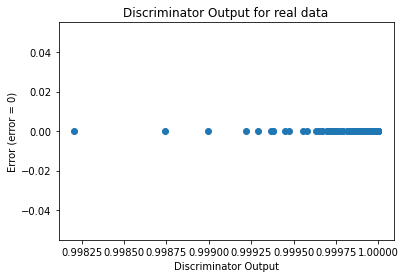

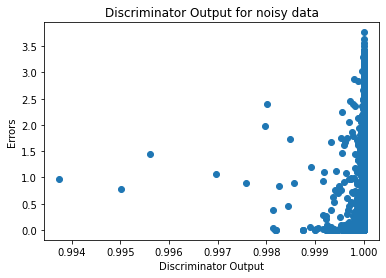

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6253]], device='cuda:0', requires_grad=True)
